In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('sales.csv')

In [ ]:
df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [ ]:
#dropping columns d_1933 to 1941, to make it a perfect multiple of 28
columns_to_drop = [f'd_{x}' for x in range(1933, 1942)]
df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1923,d_1924,d_1925,d_1926,d_1927,d_1928,d_1929,d_1930,d_1931,d_1932
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,2,1,2,2,1,0,2
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,2,1,3,0,0,1,0,1


In [ ]:
#Calculating sum of 28 columns together
sum_columns = {}
for i in range(6, 1938, 28):
    sum_columns[f'm_{i//28 - 6//28 + 1}'] = df.iloc[:, i:i+28].sum(axis=1)
sum_df = pd.DataFrame(sum_columns)
#creating new df without d_x columns
columns_to_retain = df.columns[:6]  # Columns before d_1
final_df = pd.concat([df[columns_to_retain], sum_df], axis=1)

In [ ]:
final_df.head(3)

,id,item_id,dept_id,cat_id,store_id,state_id,m_1,m_2,m_3,m_4,...,m_60,m_61,m_62,m_63,m_64,m_65,m_66,m_67,m_68,m_69
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,22,18,16,12,21,26,19,30,28,33
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,15,9,9,11,27,4,4,7,5,3
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,9,21,13,20,42,13,9,14,9,22


In [ ]:
final_df.to_csv('sales_28.csv', index=False)

In [ ]:
cal = pd.read_csv('calendar.csv')
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [ ]:
#dropping snap and weekday columns
cal = cal.drop(columns=['snap_CA', 'snap_TX', 'snap_WI', 'weekday'])
#subtracting 11100 from wm_yr_wk
cal['wm_yr_wk'] = cal['wm_yr_wk'] - 11100
#consolidating event_name_1 and event_name_2 into a single column 'event'
cal['event'] = ((cal['event_name_1'].notna()) | (cal['event_name_2'].notna())).astype(int)
cal = cal.drop(columns=['event_name_1', 'event_type_1', 'event_name_2', 'event_type_2'])

Note: Week starts from Saturay in the dataset, so Saturday is 1

In [ ]:
cal.head(3)

,date,wm_yr_wk,wday,month,year,d,event
0,2011-01-29,1,1,1,2011,d_1,0
1,2011-01-30,1,2,1,2011,d_2,0
2,2011-01-31,1,3,1,2011,d_3,0


In [ ]:
#converting date to day, as month and year columns already exist
cal['date'] = pd.to_datetime(cal['date'])
cal['day'] = cal['date'].dt.day
cal = cal.drop(columns=['date'])

In [ ]:
cal.head(3)

,wm_yr_wk,wday,month,year,d,event,day
0,1,1,1,2011,d_1,0,29
1,1,2,1,2011,d_2,0,30
2,1,3,1,2011,d_3,0,31


In [ ]:
cal.to_csv('cal.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df=final_df

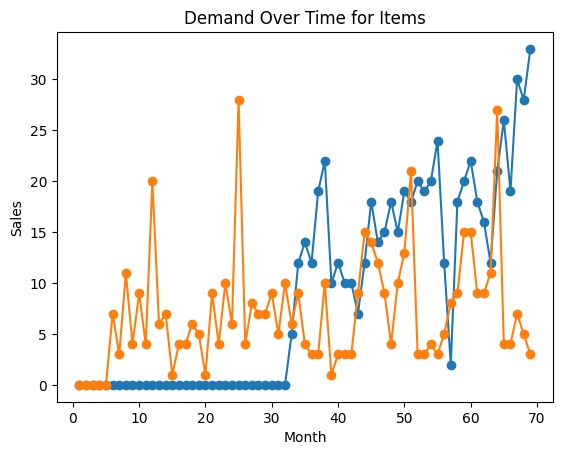

In [ ]:
for i in range(2):
  sales_data = df.iloc[i, 6:].values  # Assuming sales data starts from m_1
  months = range(1, 70)
  plt.plot(months, sales_data, marker='o')
  plt.title('Demand Over Time for Items')
  plt.xlabel('Month')
  plt.ylabel('Sales')
  plt.grid()
plt.show()

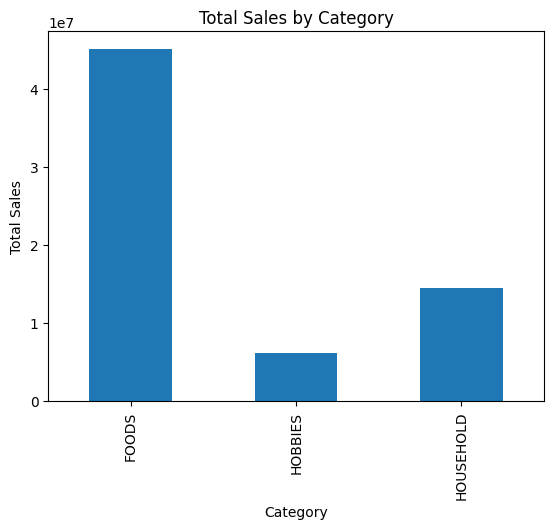

In [ ]:
category_sales = df.groupby('cat_id').sum().iloc[:, 6:].sum(axis=1)
category_sales.plot(kind='bar', title='Total Sales by Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
sns.boxplot(x='dept_id', y='Sales', data=df.melt(id_vars=['dept_id'], value_vars=df.columns[6:]))
plt.title('Sales Distribution by Department')
plt.xlabel('Department')
plt.ylabel('Sales')
plt.show()

ValueError: Could not interpret value `Sales` for `y`. An entry with this name does not appear in `data`.

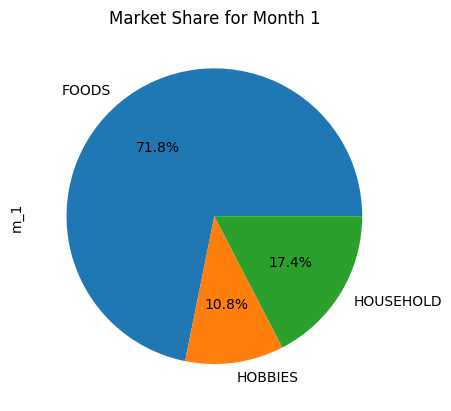

In [ ]:
month_sales = df[['cat_id'] + list(df.columns[6:])].groupby('cat_id').sum().iloc[:, 0]  # For m_1
month_sales.plot(kind='pie', autopct='%1.1f%%', title='Market Share for Month 1')
plt.show()